# Análisis de Anomalías Meteorológicas 1964-2013

##### Se importan las librerías relevantes para nuestro análisis:

In [59]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib  as mpl
import matplotlib.pyplot as plt
import datetime

pd.options.display.max_rows = 10
pd.options.display.float_format = '{:.2f}'.format 

#### A continuación se trabajará con un Dataset de Anomalías Climatológicas Histórico


Los datos presentados en nuestro dataset corresponden a observaciones climatológicas tomadas por las estaciones del meterorológicas pertenecientes a Estados Unidos, durante un período consecutivo de 50 años.

Estación meteorológica: una instlación destinada a medir y registrar regularmente diversas variables meteorológicas, (Wikipedia).

##### Datos relevantes:

* Promedio de observaciones por estación: 1 000
    
* Período de observación: 50 años Enero 1964 - Diciembre 2013

* Total de observaciones: 3 196 832 

* Días observados: 18 262 

* Número de Estaciones: 2 716  

    * Estaciones en Estados Unidos: 2 696
    * Estaciones en Puerto Rico: 17
    * Estaciones en las Islas Vírgenes: 2
    * Estaciones en Guam (Isla Mariana del Norte): 1
    * Hawaii: 2


##### Notas:

    * Algunas estaciones ya no se encuentran activas actualmente
    * Algunas estaciones se ubican fuera de Estados Unidos, estos se conocen como Territorios no incorporados: 
        ~ Puerto Rico, 
        ~ Guam, 
        ~ Islas Vírgenes
    * Datos tomados de Enigma

#### Contexto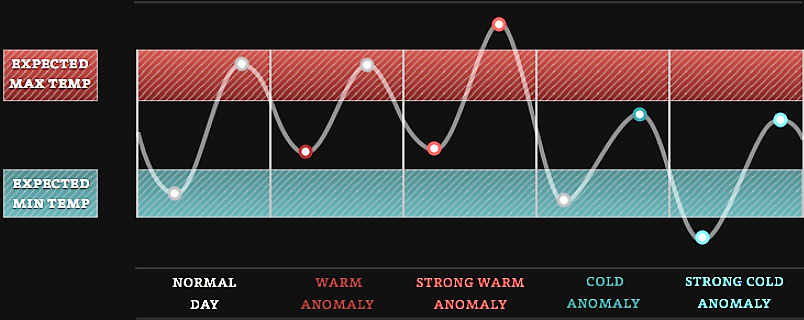


#### Se importa el dataset a analizar, mediante la función pd.read_csv de la libería de pandas:

In [60]:
weather = pd.read_csv("USWeatherAnomalies_1964_2013.csv")

#### Para obtener una vista rápida de los datos en nuestro dataset, usamos la función df.head():

In [61]:
weather.head()

,date_str,degrees_from_mean,id,longitude,latitude,max_temp,min_temp,station_name,type,serialid,latitude_longitude_appended
0,1980-07-07T00:00:00,5.46,USW00003809,-89.41,36.00,37.80,23.90,DYERSBURG III GOLF,Weak Hot,2443381,"36.0003, -89.41"
1,1980-07-07T00:00:00,12.69,USC00143837,-100.44,39.35,41.10,22.80,HOXIE,Strong Hot,2443382,"39.3533, -100.4397"
2,1980-07-07T00:00:00,-6.94,USC00049699,-122.31,39.52,27.20,8.90,WILLOWS 6 W,Weak Cold,2443383,"39.5231, -122.3058"
3,1980-07-07T00:00:00,6.85,USC00254440,-103.63,41.25,37.80,16.10,KIMBALL 2NE,Weak Hot,2443384,"41.2453, -103.6344"
4,1980-07-07T00:00:00,6.13,USC00297867,-103.33,35.11,36.70,25.00,SAN JON,Weak Hot,2443385,"35.1086, -103.3283"


#### Con el fin de mantener un orden en nuestras observacioes, ordenaremos por fecha nuestro dataset, la cual se encuentra representada en la columna date_str, columna 0, para ello usamos la funcion *df.sort_values* y *df.reset_index* para que nuestro index automático se ordene a su vez:

In [62]:
weather= weather.sort_values(by=['date_str'])
weather= weather.reset_index(drop=True)

#### Con la función *df.info()* podremos conocer la cantidad de observaciones en nuestro dataset así como el tipo de dato de las columnas:

In [63]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3196832 entries, 0 to 3196831
Data columns (total 11 columns):
date_str                       object
degrees_from_mean              float64
id                             object
longitude                      float64
latitude                       float64
max_temp                       float64
min_temp                       float64
station_name                   object
type                           object
serialid                       int64
latitude_longitude_appended    object
dtypes: float64(5), int64(1), object(5)
memory usage: 268.3+ MB


#### La función df.describe() permite obtener información estadística de nuestro dataset:

In [64]:
weather.describe()

,degrees_from_mean,longitude,latitude,max_temp,min_temp,serialid
count,3196832.00,3196832.00,3196832.00,3196832.00,3196832.00,3196832.00
mean,-0.20,-97.82,39.28,18.56,5.60,1598416.50
std,14.62,17.39,6.43,14.70,14.00,922846.05
min,-103.18,-170.22,13.48,-54.40,-55.00,1.00
25%,-11.32,-109.48,34.99,10.00,-2.20,799208.75
50%,5.48,-95.97,39.51,21.10,7.80,1598416.50
75%,10.76,-85.15,43.58,30.00,16.70,2397624.25
max,348.75,144.80,71.28,54.40,382.20,3196832.00


#### Observando las columnas de nuestro dataset podemos prescindir de la columna "Serial ID", pues no nos brinda información significativa a nuestro dataset, para ello usamos df.drop():

In [65]:
weather = weather.drop('serialid', 1)

#### Adicionalmente se buscó información para confirmar los datos de la columna "Degrees_From_Mean", debido a la falta de estos se consideró prescindir de la misma, como con la columna anterior:

In [66]:
weather = weather.drop('degrees_from_mean', 1)

#### Para mayor claridad y estandarización de los datos presentados en las columnas restantes, modificaremos el nombre de las columnas, como sigue:

In [67]:
weather.rename(columns={'date_str':'Date','degrees_from_mean':'Degrees_From_Mean', 'id': 'ID_Station', 'longitude':'Longitude', 'latitude':'Latitude', 'max_temp':'Max_Temp', 'min_temp':'Min_Temp', 'station_name': 'Station_Name', 'type': 'Climate_Type', 'latitude_longitude_appended':'Lat-Long_App.'}, inplace=True)
weather.head()

,Date,ID_Station,Longitude,Latitude,Max_Temp,Min_Temp,Station_Name,Climate_Type,Lat-Long_App.
0,1964-01-01T00:00:00,USC00252205,-97.13,41.25,14.40,-4.40,DAVID CITY,Weak Hot,"41.2492, -97.1328"
1,1964-01-01T00:00:00,USC00168163,-91.23,31.95,2.80,-8.90,ST JOSEPH 3 N,Weak Cold,"31.9497, -91.2336"
2,1964-01-01T00:00:00,USC00147093,-101.81,39.77,18.30,1.10,SAINT FRANCIS,Weak Hot,"39.7675, -101.8067"
3,1964-01-01T00:00:00,USC00396427,-103.48,44.06,12.80,0.60,PACTOLA DAM,Weak Hot,"44.0622, -103.4819"
4,1964-01-01T00:00:00,USW00023065,-101.70,39.37,15.60,0.60,GOODLAND,Weak Hot,"39.3669, -101.7"


#### Observando el tipo de dato de la columna date_str, actualmente 'Object', asi como el formato de la misma: Y-m-dTH:M:S, se hace importante modificarla, para ello crearemos una función, la cual tomará el series data_str y convertirá cada observación a un formato de fecha y hora  y tipo de dato 'Timestamp':

In [68]:
Date = weather['Date']

def convertirTiempo(columna):
    for indice_tiempo in range(np.size(columna, 0)):
        columna.values[indice_tiempo] = datetime.datetime.strptime(columna.values[indice_tiempo], "%Y-%m-%dT%H:%M:%S")
       
convertirTiempo(Date)

#### Resultado:

In [69]:
Date.head()

0    1964-01-01 00:00:00
1    1964-01-01 00:00:00
2    1964-01-01 00:00:00
3    1964-01-01 00:00:00
4    1964-01-01 00:00:00
Name: Date, dtype: object

#### Un poco de observacion sobre este atributo de nuestro dataset nos hará ver que el tiempo en todas nuestras fechas es 00:00:00, con lo que nos es posible prescindir de la misma y solo conservar la fecha para cada observación, para ello le damos formato a la columna como sigue:

In [70]:
weather['Date'] =  pd.to_datetime(weather['Date'],
                              format= '%Y-%m-%d')

In [71]:
Date.dt.year.head()

0    1964
1    1964
2    1964
3    1964
4    1964
Name: Date, dtype: int64

#### Nuevamente usemos la función .info() para ver cómo se ha modificado nuestra columna de fechas, ahora el tipo de dato indica: datetime64, es decir, un formato de fecha:

In [72]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3196832 entries, 0 to 3196831
Data columns (total 9 columns):
Date             datetime64[ns]
ID_Station       object
Longitude        float64
Latitude         float64
Max_Temp         float64
Min_Temp         float64
Station_Name     object
Climate_Type     object
Lat-Long_App.    object
dtypes: datetime64[ns](1), float64(4), object(4)
memory usage: 219.5+ MB


#### Algunas funciones de información para darnos una vista general de los datos a trabajar y el tipo de estos, serían:

Para conocer el indice por defecto de nuestro dataset:

In [73]:
weather.index

RangeIndex(start=0, stop=3196832, step=1)

Para conocer el nombre de nuestras columnas:

In [74]:
weather.columns

Index(['Date', 'ID_Station', 'Longitude', 'Latitude', 'Max_Temp', 'Min_Temp',
       'Station_Name', 'Climate_Type', 'Lat-Long_App.'],
      dtype='object')

Para dar un vistazo a los valores contenidos en nuestras columnas:

In [75]:
weather.values

array([[Timestamp('1964-01-01 00:00:00'), 'USC00252205', -97.1328, ...,
        'DAVID CITY', 'Weak Hot', '41.2492, -97.1328'],
       [Timestamp('1964-01-01 00:00:00'), 'USC00168163', -91.2336, ...,
        'ST JOSEPH 3 N', 'Weak Cold', '31.9497, -91.2336'],
       [Timestamp('1964-01-01 00:00:00'), 'USC00147093', -101.8067, ...,
        'SAINT FRANCIS', 'Weak Hot', '39.7675, -101.8067'],
       ...,
       [Timestamp('2013-12-31 00:00:00'), 'USC00474482', -88.8967, ...,
        'LAKE MILLS', 'Weak Cold', '43.0803, -88.8967'],
       [Timestamp('2013-12-31 00:00:00'), 'USC00049490', -122.9331, ...,
        'WEAVERVILLE', 'Weak Hot', '40.7222, -122.9331'],
       [Timestamp('2013-12-31 00:00:00'), 'USC00477113', -89.4508, ...,
        'RHINELANDER', 'Strong Cold', '45.5986, -89.4508']], dtype=object)

### Limpieza de las columnas: Temp_Max y Temp_Min

Analizando las columnas de Temperatura Máxima y Temperatura Mínima, nos encontramos con una incongruencia en varias observaciones del dataset, ciertas observaciones indican que las temperaturas minimas son mayores a las temperaturas maximas. Un total de  9 153 observaciones que representa 0.27% del total de observaciones mapeadas, 5 839 fechas presentan esta incongruencia de temperaturas, siendo el 32% de los días analizados. Además, se logra apreciar que el 71% de las estaciones presentan la anomalía mencionada. 

Por lo que se procede a analizar los datos y se obtiene que para las estaciones que presentan esta irregularidad solo 4 estaciones presentan un porcentaje superior al 4%.

#### Observaciones

    Número de observaciones con el error: 9 153
    Número de observaciones en weather: 3 196 382
        Porcentaje de días que presentan el error: 32%
        
_Conclusión:_
No es representativo.

#### Se extrae con la ayuda de una máscara booleana donde las observaciones donde la Temperatura Máxima es menor a la Temperatura Mínima:

In [20]:
Subseg= (weather['Max_Temp'] < weather['Min_Temp'])
rSubseg= weather[Subseg]
rSubseg

,Date,ID_Station,Longitude,Latitude,Max_Temp,Min_Temp,Station_Name,Climate_Type,Lat-Long_App.
8919,1964-03-30,USC00310090,-80.20,35.40,-48.90,-4.40,ALBEMARLE,Weak Cold,"35.3992, -80.1994"
9310,1964-03-31,USC00055322,-105.94,37.17,17.20,18.30,MANASSA,Weak Hot,"37.1742, -105.9392"
9958,1964-04-02,USC00055322,-105.94,37.17,5.00,9.40,MANASSA,Weak Hot,"37.1742, -105.9392"
14282,1964-04-30,USC00229743,-89.62,33.48,6.10,7.20,WINONA 5 E,Weak Cold,"33.4847, -89.6244"
28015,1964-06-25,USW00003859,-81.21,37.30,23.30,179.40,BLUEFIELD MERCER CO AP,Weak Hot,"37.2958, -81.2078"
...,...,...,...,...,...,...,...,...,...
3084539,2012-05-14,USC00419715,-97.38,31.86,16.10,28.30,WHITNEY DAM,Weak Cold,"31.8611, -97.375"
3090166,2012-06-04,USC00483100,-110.95,41.27,8.90,28.90,EVANSTON 1 E,Weak Cold,"41.265, -110.9508"
3091665,2012-06-18,USC00115943,-88.85,38.35,30.00,33.30,MT VERNON 3 NE,Weak Hot,"38.3483, -88.8533"
3092035,2012-06-19,USC00243530,-110.30,48.57,9.40,20.60,GILDFORD,Weak Cold,"48.5653, -110.3022"


#### 1. Estaciones:

    Cantidad de estaciones que presentan al menos un error: 1 940
    Cantidad de estaciones registradas en weather: 2 716
        Porcentaje de estaciones que presentan el error: 71,42% ~ 71%
        
_Conclusión:_ 
Dicho porcentaje es representativo en cuanto al total de estaciones por ello se ralizará una revisión a detalle por observaciones por estaciones.

#### Usando la máscara anterior, agrupamos por Estaciones y contamos el número de observaciones por estación que presentan el error:

In [21]:
rSubseg
filterss= rSubseg.groupby(['Station_Name']).count()
filterss
filterordered= filterss.sort_values('Date', ascending=False)
filterordered

,Date,ID_Station,Longitude,Latitude,Max_Temp,Min_Temp,Climate_Type,Lat-Long_App.
Station_Name,,,,,,,,
BRACKETTVILLE,75,75,75,75,75,75,75,75
ALCOVE DAM,71,71,71,71,71,71,71,71
BAY CITY WTR WKS,62,62,62,62,62,62,62,62
CAMPO,42,42,42,42,42,42,42,42
POTEET,42,42,42,42,42,42,42,42
...,...,...,...,...,...,...,...,...
NEW CASTLE 1 N,1,1,1,1,1,1,1,1
KEWAUNEE,1,1,1,1,1,1,1,1
SENECA,1,1,1,1,1,1,1,1


#### Se convierten los valores de la columna Station_Name a una lista para ser usada mas adelante en nuestro análisis:

In [22]:
stationlist= list(filterordered.index)
stationlist

['BRACKETTVILLE',
 'ALCOVE DAM',
 'BAY CITY WTR WKS',
 'CAMPO',
 'POTEET',
 'PERU 2 WSW',
 'WARSAW 6 SW',
 'JORDAN',
 'CHARMANY FARM',
 'DANNEMORA',
 'BUTTE 5SE',
 'ST JAMES 4SSW BEAVER',
 'VERNAL 2SW',
 'LONDON LOCKS',
 'TEMPE ASU',
 'OZONA',
 'CARSON CITY',
 'PEMBINA',
 'OMAK AP',
 'EVANSTON 1 E',
 'BLOOMFIELD 3 SE',
 'FRANKFORT 2NE',
 'KING CITY',
 'SARATOGA SPRINGS 4 SW',
 'TRONA',
 'NORTH VERNON 2 ESE',
 'HARTWELL',
 'JORDAN 1SSW',
 'MT CLEMENS ANG BASE',
 'CLARKSBURG 1',
 'SUSANVILLE 2SW',
 'RANTOUL',
 'BRITT',
 'MARION 2 NW',
 'WARSAW MARKLAND DAM',
 'RUSK',
 'LITTLE PORT WALTER',
 'FALLS VILLAGE',
 'SAN FRANCISCO OCEANSD',
 'GARNETT 1 E',
 'WISHEK',
 'BIG BAR 4 E',
 'BLYTHE',
 'MONROE',
 'POINT COMFORT',
 'OCONTO 4 W',
 'GOLD BEACH RS',
 'FT ROBINSON',
 'GASCON',
 'DOYLE 4 SSE',
 'WAUKON',
 'BRIDGER 2 N',
 'CHURCH BUTTES GAS PLT',
 'JOHN H KERR DAM',
 'BROWNWOOD 2ENE',
 'PRESQUE ISLE',
 'GRAPEVINE DAM',
 'GIBSON DAM',
 'OCONALUFTEE',
 'CUSHING',
 'GLENBROOK',
 'GLENROCK 5 ESE',

#### En el subset se agrupan las estaciones por el total de observaciones por estación, como sigue:

In [23]:
ssgroup= rSubseg.groupby(['Station_Name']).count()
ssgroup= ssgroup.sort_values('Date', ascending=False)
ssgroup.head()


,Date,ID_Station,Longitude,Latitude,Max_Temp,Min_Temp,Climate_Type,Lat-Long_App.
Station_Name,,,,,,,,
BRACKETTVILLE,75,75,75,75,75,75,75,75
ALCOVE DAM,71,71,71,71,71,71,71,71
BAY CITY WTR WKS,62,62,62,62,62,62,62,62
CAMPO,42,42,42,42,42,42,42,42
POTEET,42,42,42,42,42,42,42,42


#### En el dataset original agrupamos las estaciones por el total de observaciones por estación, como sigue:

In [24]:
stgroup= weather[weather.Station_Name.isin(stationlist)]
stgroup = stgroup.groupby(['Station_Name']).count()
stgroup.head()


,Date,ID_Station,Longitude,Latitude,Max_Temp,Min_Temp,Climate_Type,Lat-Long_App.
Station_Name,,,,,,,,
ABIQUIU DAM,1200,1200,1200,1200,1200,1200,1200,1200
ADEL,798,798,798,798,798,798,798,798
ADRIAN 2 NNE,1212,1212,1212,1212,1212,1212,1212,1212
AFTON,846,846,846,846,846,846,846,846
AGASSIZ REFUGE,1128,1128,1128,1128,1128,1128,1128,1128


####  Se calcula la proporción de observaciones por estación, se consideran relevantes los valores mayores al 5%:

###### Total de observaciones de la estación  /  Total de observaciones con error por estación:

In [53]:
prpstat=(ssgroup.Date/stgroup.Date)*100
prpvalues= prpstat>5

prpstat[prpvalues]

Station_Name
ALCOVE DAM         6.12
BAY CITY WTR WKS   5.02
BRACKETTVILLE      6.73
Name: Date, dtype: float64

#### Conclusión: 
De 1 940 analizadas solo 4 estaciones presentan un margen de error superior al 4%, 3 de ellas superior al 5%, sin embargo, este 5% se considera no significativo, pues no viene a afectar la representatividad de cada estación a nivel del dataset a trabajar. 

#### 2. Fechas

    Cantidad de días que presentan al menos un error: 5 839
    Cantidad de días registrados en el weather: 18 262
        Porcentaje de días que presentan el error: 31,97% ~ 32%
        
        
_Conclusión:_
Dado que es la tercera parte de los días registrados en weather, se realizará una revisión más detallada por observaciones por fecha.

#### En el subset se agrupan las observaciones totales por fecha , se observan aquellas fechas cuyo conteo sea mayor a 6 observaciones:

In [26]:
dtgroup= rSubseg.groupby(['Date']).count()
dtgrouped= dtgroup.ID_Station>6

dtgroupvalues=dtgroup.sort_values('ID_Station', ascending=False)
dtgroupvalues.head()

,ID_Station,Longitude,Latitude,Max_Temp,Min_Temp,Station_Name,Climate_Type,Lat-Long_App.
Date,,,,,,,,
1989-02-04,10,10,10,10,10,10,10,10
1983-12-24,10,10,10,10,10,10,10,10
1982-01-18,9,9,9,9,9,9,9,9
1996-02-02,9,9,9,9,9,9,9,9
1994-01-18,8,8,8,8,8,8,8,8


#### Se convierten los valores de la columna Date a una lista para ser usada mas adelante en nuestro análisis:

In [27]:
datelist= list(dtgroupvalues.index)
datelist

[Timestamp('1989-02-04 00:00:00'),
 Timestamp('1983-12-24 00:00:00'),
 Timestamp('1982-01-18 00:00:00'),
 Timestamp('1996-02-02 00:00:00'),
 Timestamp('1994-01-18 00:00:00'),
 Timestamp('1983-12-25 00:00:00'),
 Timestamp('1992-12-29 00:00:00'),
 Timestamp('1983-12-26 00:00:00'),
 Timestamp('1987-01-28 00:00:00'),
 Timestamp('1982-07-01 00:00:00'),
 Timestamp('1997-01-13 00:00:00'),
 Timestamp('1996-01-31 00:00:00'),
 Timestamp('1985-02-03 00:00:00'),
 Timestamp('1994-10-16 00:00:00'),
 Timestamp('1983-04-02 00:00:00'),
 Timestamp('1982-08-25 00:00:00'),
 Timestamp('2004-01-31 00:00:00'),
 Timestamp('1982-11-23 00:00:00'),
 Timestamp('1989-02-05 00:00:00'),
 Timestamp('1982-08-02 00:00:00'),
 Timestamp('1990-12-21 00:00:00'),
 Timestamp('1993-06-18 00:00:00'),
 Timestamp('1996-02-01 00:00:00'),
 Timestamp('1997-01-12 00:00:00'),
 Timestamp('1989-01-31 00:00:00'),
 Timestamp('1994-11-13 00:00:00'),
 Timestamp('2000-05-23 00:00:00'),
 Timestamp('2000-05-07 00:00:00'),
 Timestamp('1982-06-

#### En el dataset original agrupamos el total de observaciones por fecha, como sigue:

In [28]:
ctdates = weather[weather.Date.isin(datelist)]
ctdates = ctdates.groupby(['Date']).count()
ctdates.head()


,ID_Station,Longitude,Latitude,Max_Temp,Min_Temp,Station_Name,Climate_Type,Lat-Long_App.
Date,,,,,,,,
1964-03-30,197,197,197,197,197,197,197,197
1964-03-31,298,298,298,298,298,298,298,298
1964-04-02,275,275,275,275,275,275,275,275
1964-04-30,35,35,35,35,35,35,35,35
1964-06-25,134,134,134,134,134,134,134,134


####  Se calcula la proporción de fechas que presentan el error entre el total de observaciones por fecha, se consideran relevantes los valores mayores al 5%:

In [29]:
propdates= ((dtgroup.ID_Station)/(ctdates.ID_Station))*100
propvalues= propdates>5

propdates[propvalues]

Date
1982-02-26    6.90
1982-03-24    6.67
1982-03-25    7.14
1982-03-26    6.25
1982-03-27    7.32
              ... 
2011-01-06    6.25
2011-01-19    6.25
2011-03-10    7.14
2011-03-11   12.50
2011-03-13   10.00
Name: ID_Station, Length: 563, dtype: float64

#### Conclusión:
A nivel de las observaciones totales por días, tras el análisis a detalle, se puede apreciar que un porcentaje importante de días 10% (563/5 839), se verían subrepresentados si se decide omitir el subseg. Esto porque se estarían eliminando mas del 5% de sus datos recopilados. Es por ello que se consideran los errores encontrados como error humano al momento de migrar los datos al medio digital y se procederá a invertir los valores de las 9 153 filas en el dataset original "weather".

Se procederá a invertir los valores de las columnas Max_Temp y Min_Temp con ayuda de la función iterrows(), esta nos ayuda a seleccionar los índices de las filas que presentan el error, además de un ciclo for, el cual nos permitirá iterar sobre las columnas Max_Temp y Min_Temp donde se presente que la primera sea mayor a la segunda, seguidamente emplearemos un segundo ciclo for para una vez seleccionadas las lineas con el error se inviertan estos valores en el dataset original. Finalmente exportaremos los datos a un documento .csv con un nuevo nombre: "SwitchWeather" el cual emplearemos desde este momento hasta el final del presente análisis.

#### Se exporta el dataset con los cambios realizados hasta el momento para proceder con la inversión de las columnas, dicho procedimiento se realizará direcatmente en consola, porque el proceso toma su tiempo en devolver un resultado. 

weather.to_csv("DataframeWeather_1964_2013.csv",  index=False)

#### Se copia el código empleado para la inversión de columnas:

import pandas as pd

weather = pd.read_csv("DataframeWeather_1964_2013.csv") 

test_dt = weather[weather.Max_Temp < weather.Min_Temp]

for index, row in test_dt.iterrows():
    temp = test_dt.loc[index, 'Max_Temp']
    test_dt.loc[index, 'Max_Temp'] = test_dt.loc[index, 'Min_Temp']
    test_dt.loc[index, 'Min_Temp'] = temp
    
for index, test_dt_rows in test_dt.iterrows():
    weather.Max_Temp[index] = test_dt.Max_Temp[index]
    weather.Min_Temp[index] = test_dt.Min_Temp[index]
    
weather.to_csv("SwitchWeather.csv",  index=False)

### Revisión de los datos del Dataset invertido

#### Se importa el dataset con los valores invertidos:

In [30]:
SWeather = pd.read_csv("SwitchWeather_1964_2013.csv")

#### Realizamos una prueba de que se ha cargado correctamente y que la inversión fue correctamente realizada:

In [31]:
test_dt = SWeather[SWeather.Max_Temp < SWeather.Min_Temp]
test_dt

,Date,ID_Station,Longitude,Latitude,Max_Temp,Min_Temp,Station_Name,Climate_Type,Lat-Long_App.


Como se observa anteriormente no se cuenta con valores en la columna Min_Temp mayores a los de la columna Max_Temp.

Realizamos una máscara para extraer aquellos valores que en las columnas de temperatura de nuestro dataset sean mayores a 56 grados Celsius, esto porque antes de realizar nuestra inversión de los datos pudimos comprobar con la función describe que nuestra Temperatura Máxima registrada era 54.40 C°, además, tras una revisión de las temperaturas medias en estados unidos, las temperaturas máximas rara vez exceden temperaturas de 56°C, ahora pues si después de la inversión contamos con valores mayores a dicha temperatura, consideraremos estos como _outliers_.

In [32]:
TMax56 = SWeather['Max_Temp']>56
TMax56
SWeather[TMax56]

,Date,ID_Station,Longitude,Latitude,Max_Temp,Min_Temp,Station_Name,Climate_Type,Lat-Long_App.
28015,1964-06-25,USW00003859,-81.21,37.30,179.40,23.30,BLUEFIELD MERCER CO AP,Weak Hot,"37.2958, -81.2078"
30833,1964-07-11,USC00040738,-123.21,40.74,66.70,39.40,BIG BAR 4 E,Weak Hot,"40.7406, -123.2078"
31095,1964-07-12,USC00040738,-123.21,40.74,72.20,42.20,BIG BAR 4 E,Weak Hot,"40.7406, -123.2078"
31490,1964-07-13,USC00040738,-123.21,40.74,73.30,42.80,BIG BAR 4 E,Weak Hot,"40.7406, -123.2078"
31660,1964-07-14,USC00040738,-123.21,40.74,69.40,39.40,BIG BAR 4 E,Weak Hot,"40.7406, -123.2078"
...,...,...,...,...,...,...,...,...,...
1415069,1985-12-02,USC00223887,-89.34,31.25,57.20,23.90,HATTIESBURG 5SW,Weak Hot,"31.2547, -89.3392"
1611900,1988-11-02,USC00471923,-92.02,45.53,58.30,7.20,CUMBERLAND,Weak Hot,"45.5333, -92.0222"
1613713,1988-11-15,USC00108137,-116.56,48.29,56.70,6.70,SANDPOINT EXP STN,Weak Hot,"48.2942, -116.5628"
1657359,1989-05-11,USC00350723,-118.15,43.91,57.80,13.90,BEULAH,Weak Hot,"43.9092, -118.1522"


Como se observa en la tabla anterior tenemos 41 outliers, siendo BIG BAR 4 R la estación que presenta más temperaturas máximas que superan los 56 C°, para un total de 20 de las 41 líneas mostradas arriba, el total de registros para esta estación son 900, es decir, que 2,33% de los datos son temperaturas que superan la máxima de 56 C°. Debido a lo anterior se decide prescindir de las 41 filas en el dataset invertido.


Ahora bien reescribamos nuestro dataset a trabajar, eliminando los outliers, para ello realizamos una máscara para obtener las temperaturas máximas que no superen los 56 C°. 

In [33]:
SWeather= SWeather[SWeather['Max_Temp'] < 56]
SWeather

,Date,ID_Station,Longitude,Latitude,Max_Temp,Min_Temp,Station_Name,Climate_Type,Lat-Long_App.
0,1964-01-01,USC00252205,-97.13,41.25,14.40,-4.40,DAVID CITY,Weak Hot,"41.2492, -97.1328"
1,1964-01-01,USC00168163,-91.23,31.95,2.80,-8.90,ST JOSEPH 3 N,Weak Cold,"31.9497, -91.2336"
2,1964-01-01,USC00147093,-101.81,39.77,18.30,1.10,SAINT FRANCIS,Weak Hot,"39.7675, -101.8067"
3,1964-01-01,USC00396427,-103.48,44.06,12.80,0.60,PACTOLA DAM,Weak Hot,"44.0622, -103.4819"
4,1964-01-01,USW00023065,-101.70,39.37,15.60,0.60,GOODLAND,Weak Hot,"39.3669, -101.7"
...,...,...,...,...,...,...,...,...,...
3196827,2013-12-31,USC00475255,-90.34,45.13,-20.00,-26.10,MEDFORD,Weak Cold,"45.1308, -90.3439"
3196828,2013-12-31,USC00211227,-93.13,45.55,-20.60,-30.60,CAMBRIDGE 5ESE,Weak Cold,"45.5506, -93.1264"
3196829,2013-12-31,USC00474482,-88.90,43.08,-16.70,-23.90,LAKE MILLS,Weak Cold,"43.0803, -88.8967"
3196830,2013-12-31,USC00049490,-122.93,40.72,16.10,-3.30,WEAVERVILLE,Weak Hot,"40.7222, -122.9331"


Comprobamos nuestros valores y corroboramos que nuestro dataset cuenta ahora con 3 196 791 líneas, podemos corroborar además que nuestro dataset luce mejor ahora, puesto que antes de la inversión teníamos una máxima de 382.20 y la mínima de -55 se conserva tras la inversión para la Temperatura Mínima, mientras que para nuestra columa de Temperatura Máxima la mínima era de -54.40 C° y la máxima era de 54.40, misma que se conserva ahora, pero vemos una disminución de la mínima a -52.20

In [34]:
SWeather.describe()

,Longitude,Latitude,Max_Temp,Min_Temp
count,3196791.00,3196791.00,3196791.00,3196791.00
mean,-97.82,39.28,18.58,5.57
std,17.39,6.43,14.68,13.99
min,-170.22,13.48,-52.20,-55.00
25%,-109.48,34.99,10.00,-2.20
50%,-95.97,39.51,21.10,7.80
75%,-85.15,43.58,30.00,16.70
max,144.80,71.28,54.40,45.00


A este punto se considera oportuno agregar algunas columnas a nuestro dataset, para ello usaremos otro dataset que llamaremos LocalizationList, el cual contiene los nombres de las estaciones, mismos que usaremos como la llave principal para vincular este dataset con nuestro nuevo dataset, con el dataset de localizaciones estaremos agregando información adicional para poder  ubicar nuestras estaciones por estado. Adicionalmente, la tercera columna que contiene nuestro nuevo dataset es el código de abreviación del estado que nos servirán para el análisis posterior.

Antes de incluir nuestro nuevo dataset realizaremos un cambio en el orden de la columna Station_Name, es decir, de nuestra columna clave, esto para conservar un orden lógico y visual de nuestro dataset SWeather.

In [35]:
cols = SWeather.columns.tolist()
column_to_move = "Station_Name"
new_position = 9

cols.insert(new_position, cols.pop(cols.index(column_to_move)))
SWeather = SWeather[cols]
SWeather

,Date,ID_Station,Longitude,Latitude,Max_Temp,Min_Temp,Climate_Type,Lat-Long_App.,Station_Name
0,1964-01-01,USC00252205,-97.13,41.25,14.40,-4.40,Weak Hot,"41.2492, -97.1328",DAVID CITY
1,1964-01-01,USC00168163,-91.23,31.95,2.80,-8.90,Weak Cold,"31.9497, -91.2336",ST JOSEPH 3 N
2,1964-01-01,USC00147093,-101.81,39.77,18.30,1.10,Weak Hot,"39.7675, -101.8067",SAINT FRANCIS
3,1964-01-01,USC00396427,-103.48,44.06,12.80,0.60,Weak Hot,"44.0622, -103.4819",PACTOLA DAM
4,1964-01-01,USW00023065,-101.70,39.37,15.60,0.60,Weak Hot,"39.3669, -101.7",GOODLAND
...,...,...,...,...,...,...,...,...,...
3196827,2013-12-31,USC00475255,-90.34,45.13,-20.00,-26.10,Weak Cold,"45.1308, -90.3439",MEDFORD
3196828,2013-12-31,USC00211227,-93.13,45.55,-20.60,-30.60,Weak Cold,"45.5506, -93.1264",CAMBRIDGE 5ESE
3196829,2013-12-31,USC00474482,-88.90,43.08,-16.70,-23.90,Weak Cold,"43.0803, -88.8967",LAKE MILLS
3196830,2013-12-31,USC00049490,-122.93,40.72,16.10,-3.30,Weak Hot,"40.7222, -122.9331",WEAVERVILLE


#### Finalmente se exporta el dataset limpio:

In [36]:
SWeather.to_csv("WeatherAnomalies_1964_2013.csv",  index=False)

#### Se corrobora que se exportó correctamente:

In [37]:
New_Weather = pd.read_csv("WeatherAnomalies_1964_2013.csv")
New_Weather.head()

,Date,ID_Station,Longitude,Latitude,Max_Temp,Min_Temp,Climate_Type,Lat-Long_App.,Station_Name
0,1964-01-01,USC00252205,-97.13,41.25,14.40,-4.40,Weak Hot,"41.2492, -97.1328",DAVID CITY
1,1964-01-01,USC00168163,-91.23,31.95,2.80,-8.90,Weak Cold,"31.9497, -91.2336",ST JOSEPH 3 N
2,1964-01-01,USC00147093,-101.81,39.77,18.30,1.10,Weak Hot,"39.7675, -101.8067",SAINT FRANCIS
3,1964-01-01,USC00396427,-103.48,44.06,12.80,0.60,Weak Hot,"44.0622, -103.4819",PACTOLA DAM
4,1964-01-01,USW00023065,-101.70,39.37,15.60,0.60,Weak Hot,"39.3669, -101.7",GOODLAND


### De aquí en adelante se trabajó en la consola de R, para la elaboración de los gráficos que se presentan a continuación:

El siguiente gráfico nos permite apreciar el total de observaciones capturadas por Tipo de Anomalía:

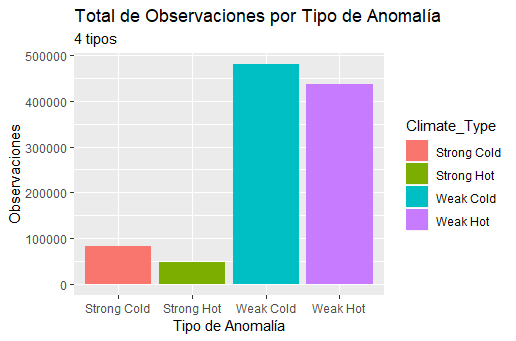

La siguiente figura nos permite visualizar cuáles Estados cuentan con mayor cantidad de estaciones climatológicas:

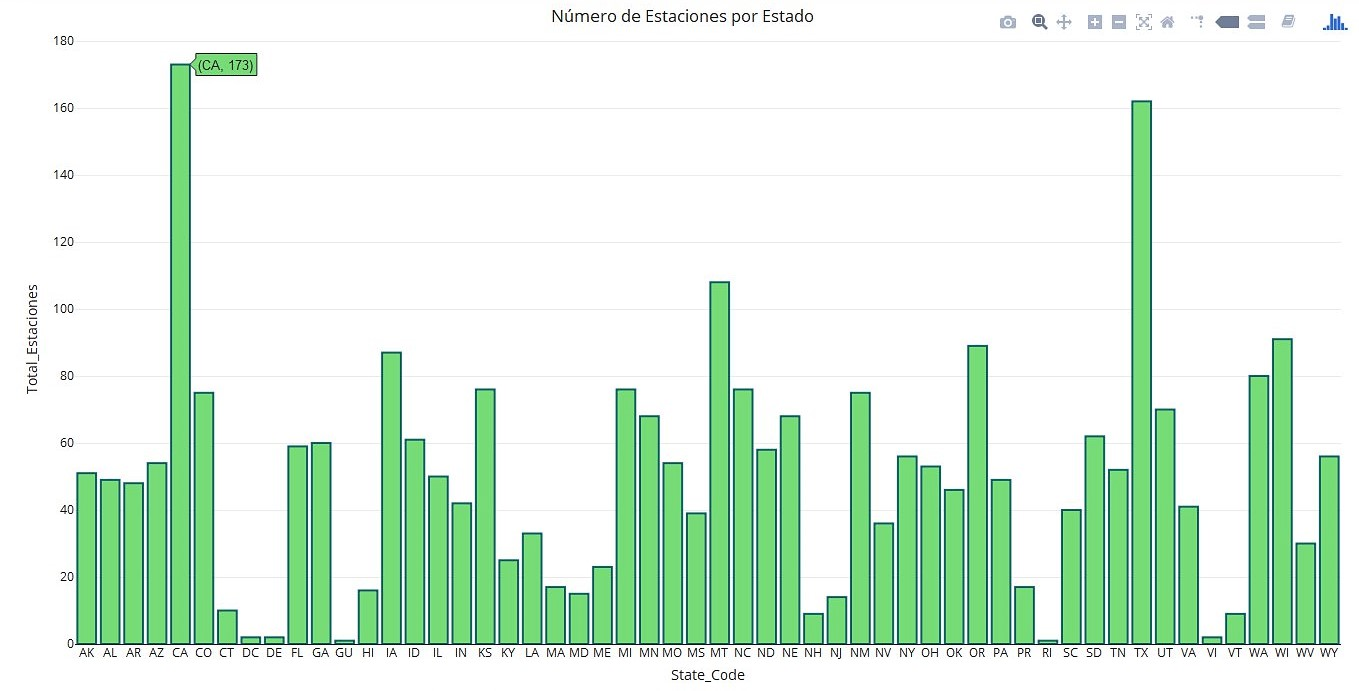

El siguiente histograma nos muestra la distribución de temperaturas máximas durante el período de 50 años:

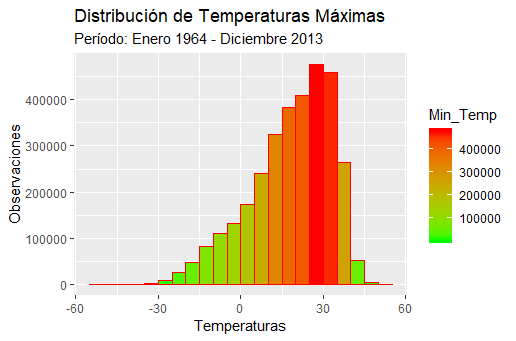

Se aprecia que las temperaturas máximas se concentran entre 25°C y 40°C.

En cuanto a la distribución de temperaturas mínimas las mismas se concentran entre los 5°C y 20°C:

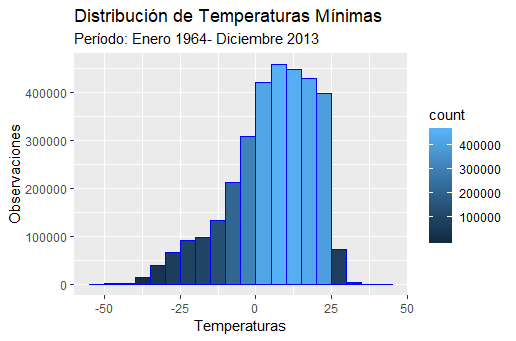

La siguiente vista nos permite apreciar la distribución de densidad por tipo de anomalía.
Se observa que las anomalías Weak Hot y Strong Hot son aquellas observaciones que se presentan entre los 0°C y más allá de los 30°C:

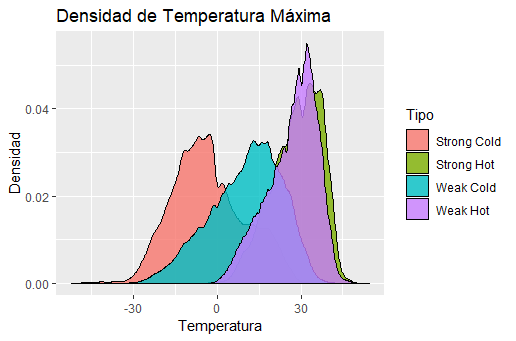

Asimismo siguiendo el patrón anterior se aprecia que en las temperaturas mínimas las anomalías cálidas son las que representan las temperaturas entre los 0°C y hasta los 25°C:

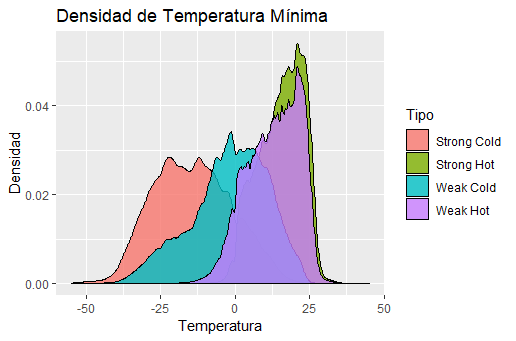

El siguiente gráfico lineal nos muestra la temperatura media para el período de 50 años en nuestro dataset, se puede concluir que se ha registrado un aumento de la temperatura anual promedio para el territorio de los Estados Unidos:

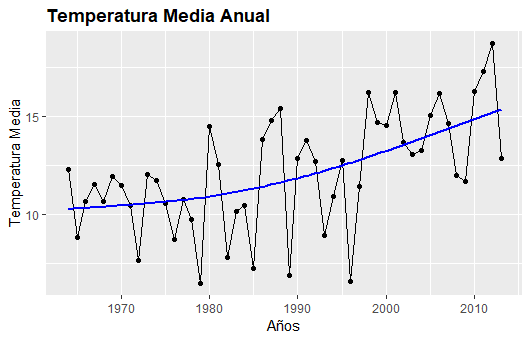

En esta figura, se graficó el promedio anual para las temperaturas máximas y mínimas de Enero 1964 a Diciembre 2018. Se puede concluir que las temperaturas mínimas medias anuales se mantienen en su mayoría por debajo de los 10°C algunos años incluso rozando los 0°C. Por otro lado, las temperaturas máximas medias anuales superan los 15°C y en los últimos años a tendido a incrementarse hasta los 25°C.

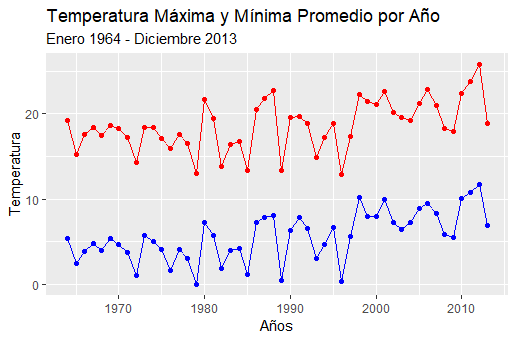

Finalmente, el siguiente gráfico nos permite observar el comportamiento por estado considerando el promedio total de los 50 años en observación:

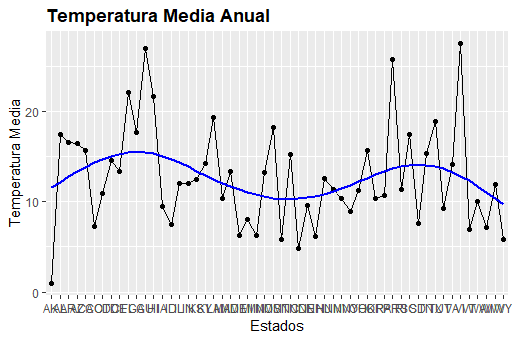

De la figura anterior es importante indicar:
* Los picos presentados, representan las estaciones ubicadas en Puerto Rico, Guam y Virgin Island, dado que estos territorios se encuentran al nivel del mar presentan temperaturas calientes a lo largo del año, y su promedio de temperaturas ronda entre los 25°C y los 33°C.
* Los Estados con un número de estaciones menor contaran con menos observaciones lo que a su vez impactará en los rasultados graficados.


#### En el siguiente mapa se graficaron las temperaturas promedios por estado, entre más claro el color (amarillo) se presentan temperaturas cálidas, mientras que entre más oscura su graduación se presentan temperaturas promedios frías.

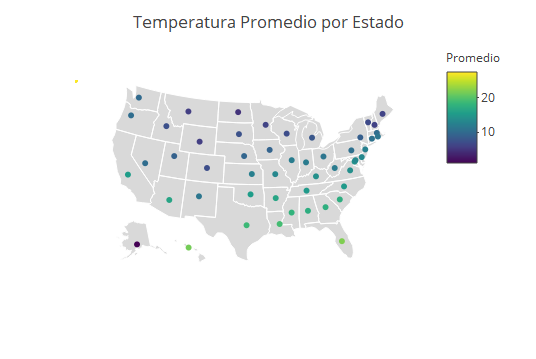

#### Un overview para apreciar los territorios no incorporado y Hawaii:

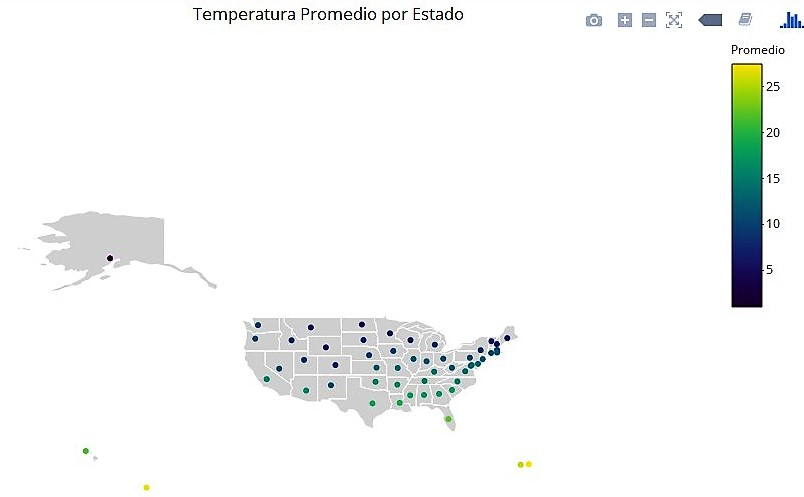

La siguiente tabla muestra las temperaturas promedios por tipo de clima para cada uno de los Estados en nuestro dataset:

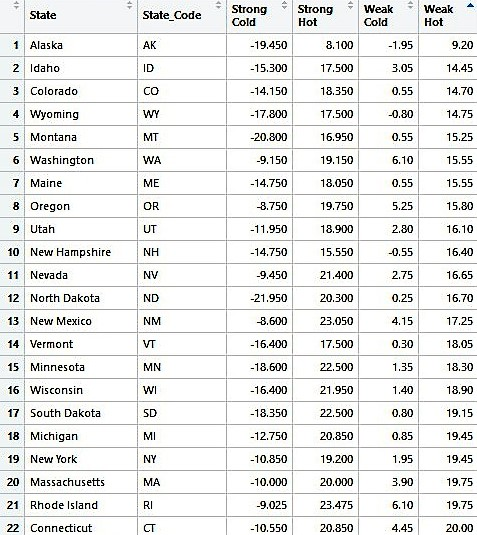

El siguiente mapa colorpleth nos muestras las temperaturas mínimas promedio para el primer año de nuestro dataset, como bien se aprecia entonces Alaska presentaba un mínimo promedio de -13, 41°C:

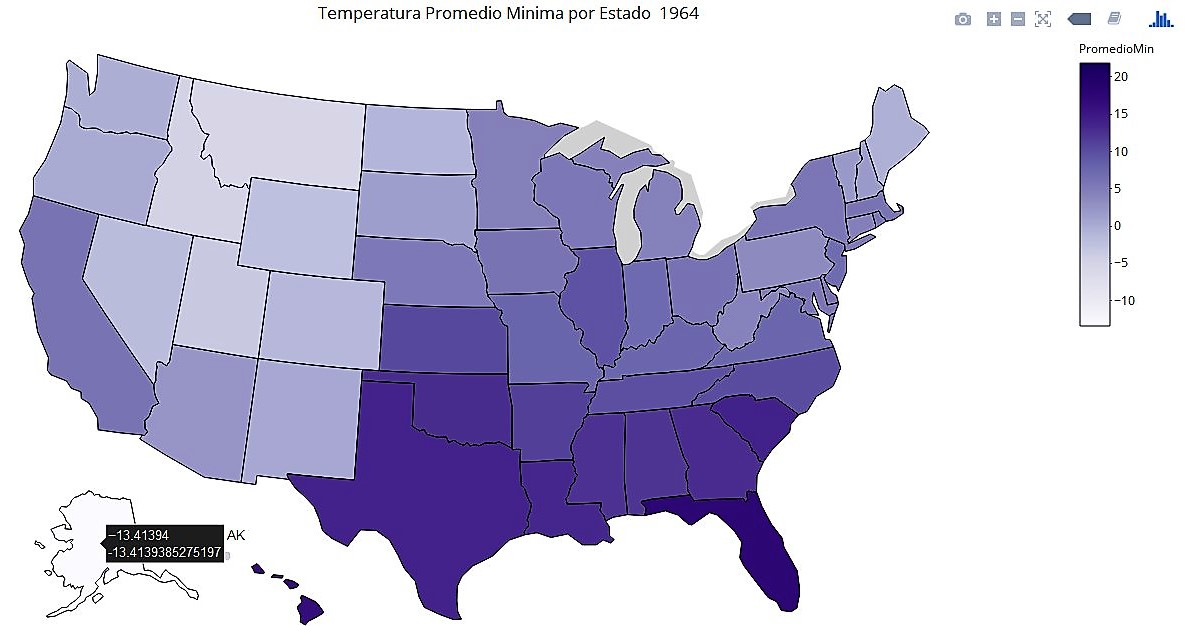

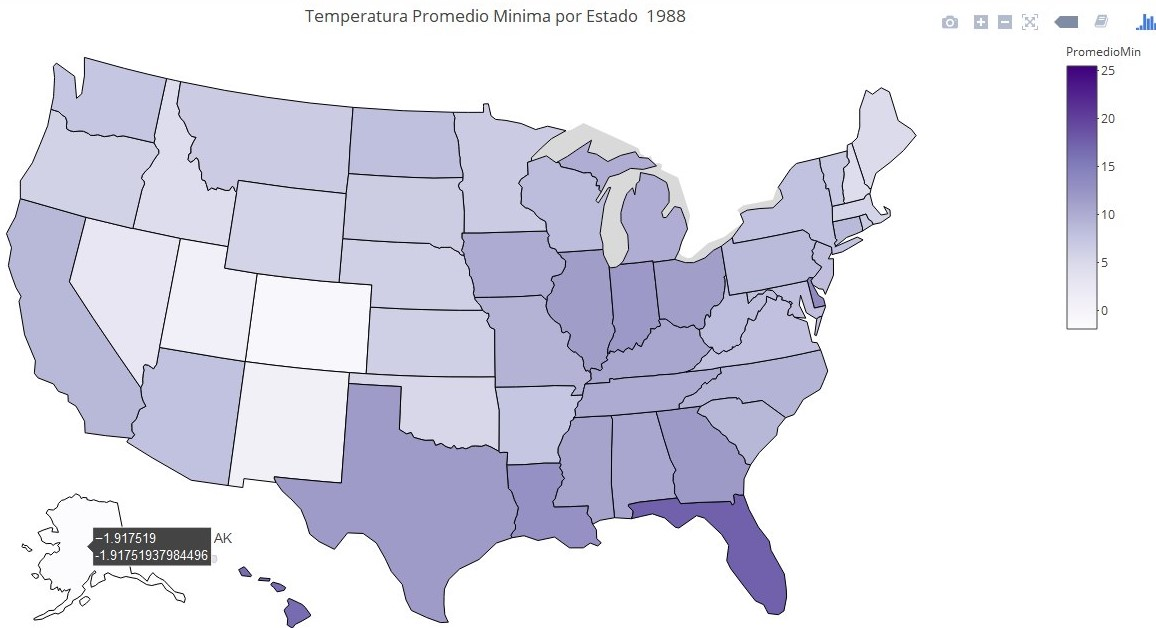

Mientras que en el 2013, el último año de nuestro dataset, Alaska presentó un mínimo promedio de 2,41°C:

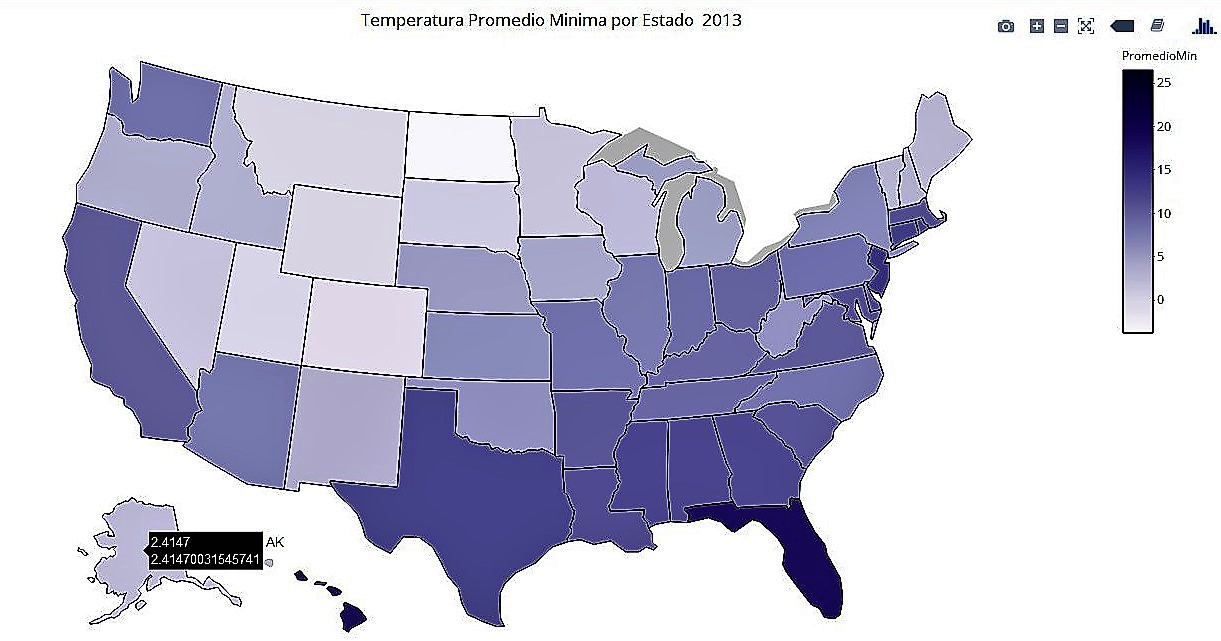

En base al ejemplo más radical , que sería Alaska, se puede concluir que el cambio climático ha venido a afectar en un aumento de las temperaturas, mientras que en el período evaluado Alaska presentó temperaturas entre los -15°C a 4.42°C, otros estado como Texas oscilaron entre 3°C a 17°C.

#### Demos un vistazo al cambio en las temperaturas máximas:

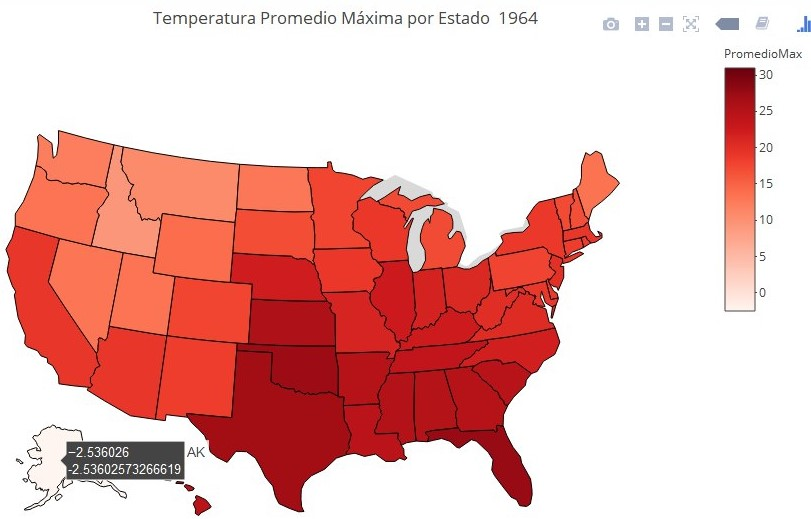

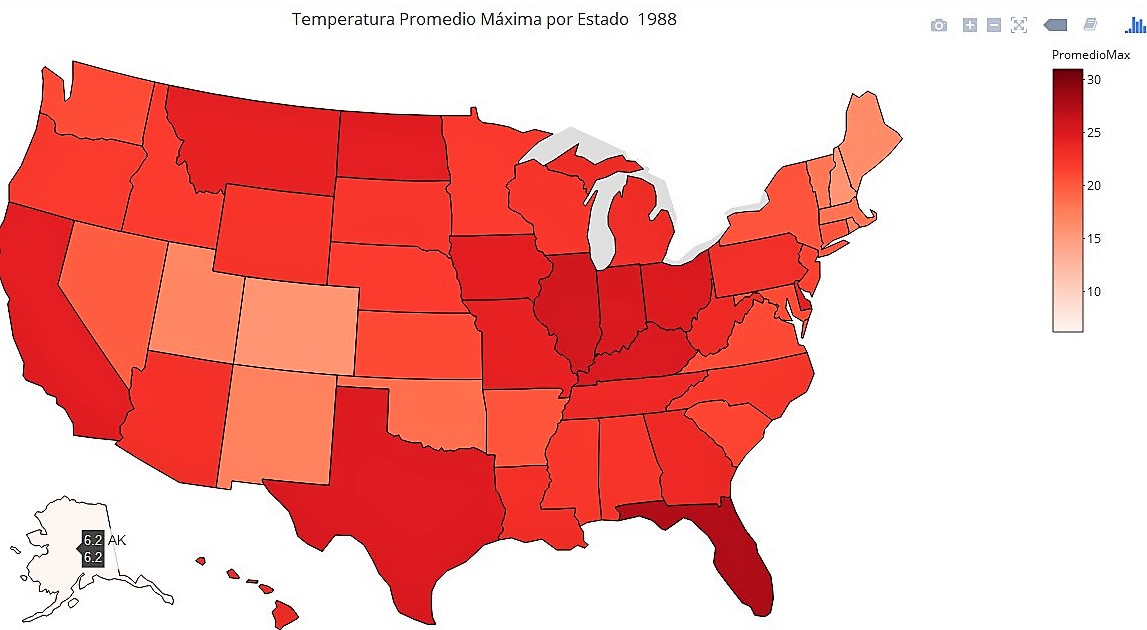

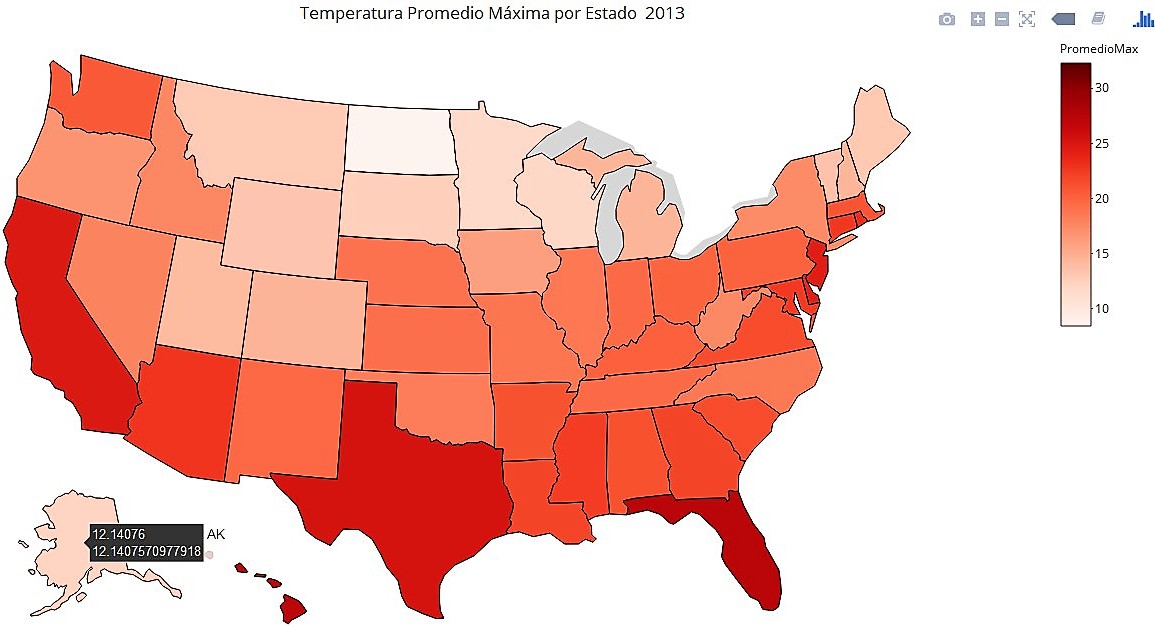

#### Noticia

La siguiente imagen nos muestra un ejemplo de lo que ha sucedido con Alaska tras el aumento generalizado de las temperaturas en el planeta. El _permafrost_ es el suelo congelado que conforma la espina dorsal de la tundra ártica, mismo que se está derritiendo debido al incremento global de las temperaturas. Se dice además, que el deshilo del _permafrost_ contribuiría a incrementar los gases invernaderos que contribuyen al calentamiento global  llegando a causar afectaciones a nivel mundial.

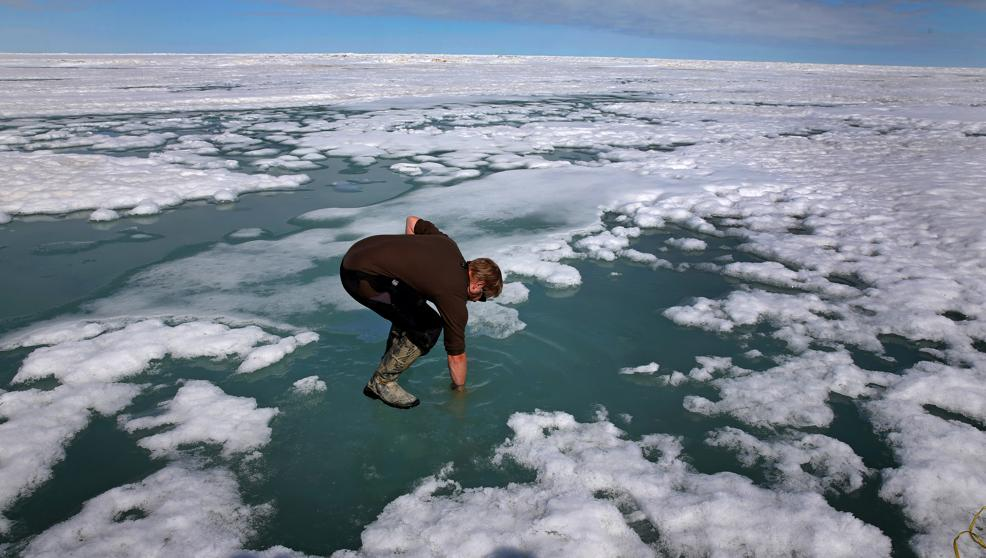

"Josh Jones. El científico de la Universidad Fairbanks de Alaska mete su brazo en el hielo del permafrost en Barrow (noroeste ). La temperatura del suelo helado en zonas del norte del estado ha subido de -8ºC a -3ºC en las últimas décadas" (Boston Globe / Getty)

#### Noticia
"Se estima que el permafrost del Ártico acumula cantidades que oscilan entre los 1.400 y los 1.850 millones de toneladas métricas de carbono, según el programa Ciencia Beta de la NASA. A día de hoy, se cree que el permafrost mundial contiene el doble de carbono del que hay presente en la atmósfera y su liberación contribuiría a un calentamiento global más rápido." _(Fuente: La Vanguardia, Alaska se muere de calor , 2017)_